Q1.

    네이버 영화 랭킹 가져와서 첫번째 영화 제목을 출력하세요

In [2]:
#모듈 import
import urllib.request as req
from bs4 import BeautifulSoup

#URL 받아오기 (영화랭킹사이트)
URL="https://movie.naver.com/movie/sdb/rank/rmovie.nhn"

#urllib.request 모듈 사용해서 byte 파일 가져오기
response = req.urlopen(URL)
print('respnse type =', type(response)) #class파일 -byte파일로 인식해서 b'~' 파일 출력

#받아온 byte파일을 BeautifulSoup으로 parser생성
soup = BeautifulSoup(response, 'html.parser')
print('soup type=', type(soup)) #class 파일 -bs4,BeautifulSoup 파일로 인식됨.

#가지고 오고 싶은 텍스트 서칭
#영화랭킹은 Tag <tr> -> tag<td class 'title' -> tag<div class 'tit3' -> tag<a href~ 안에 존재
find_text = soup.select_one('div.tit3>a').string

#출력
print(find_text)

Q2

    네이버 영화 랭킹 가져와서 전체 영화 제목을 출력하세요

In [46]:
# 모듈~ URL~ urlopen~ parser 동일
# 가지고 오고 싶은 텍스트 서칭
# 영화랭킹은 Tag <tr> -> tag<td class 'title' -> tag<div class 'tit3'  에 속해있음
find_texts = soup.select("td.title>div.tit3>a")
for i in find_texts:
    print(i.string)

발신제한
인 더 하이츠
랑종
크루엘라
미드나이트
콰이어트 플레이스 2
블랙 위도우
킬러의 보디가드 2
루카
제8일의 밤
체르노빌 1986
투모로우 워
빛나는 순간
괴기맨숀
컨저링 3: 악마가 시켰다
싱크홀
기담
아이스 로드
열아홉
캐시트럭
분노의 질주: 더 얼티메이트
다크 앤드 위키드
모가디슈
여고괴담 여섯번째 이야기 : 모교
이보다 더 좋을 순 없다
인질
메이드 인 루프탑
극장판 귀멸의 칼날: 무한열차편
콰이어트 플레이스
셔터
뱅퀴시
미션 임파서블: 루벤
이스케이프 룸 2: 노 웨이 아웃
웬디
더 퍼지: 포에버
이번엔 잘 되겠지
방법: 재차의
보스 베이비 2
블라이스 스피릿
더 수어사이드 스쿼드
북샵
우리는 매일매일
혼자 사는 사람들
오필리아
시카다 3301
샤크 : 더 비기닝
한산: 용의 출현
스페이스 잼: 새로운 시대
그린 북
트립 투 그리스


Q3

    "http://api.aoikujira.com/time/get.php"으로 부터 아래와 같이 출력하세요.
    # 2020/08/02 08:06:45
    # b'2020/08/02 08:06:45'

In [75]:
# 모듈 import (위에서 함)
# URL 
URL = 'http://api.aoikujira.com/time/get.php'

#urlopen
response = req.urlopen(URL) #이 상태가 byte 상태로 불러오게 됨(HTTP)
print(type(response),response.read())

#BeautifulSoup로 parser  #여기선 class가 BeautifulSoup로 변환
soup = BeautifulSoup(response,'html.parser')
print(type(soup),soup) #내부가 읽히지 않는다. 

# urllib.request 사용시 text로 읽으려면 decode('utf-8')
text_data = soup.decode('utf-8')
print(type(text_data),text_data) #str로 읽히고 내부가 읽히지 않음

#따라서 binary상태를 요구할때는 urlopen한 상태로 유지해야 함.
#또한 text파일으로 불러오기 위해선 BeautifulSoup으로 html.parser로 변환하면 읽히지 않음
#text파일로 출력하기 위해선 urlopen한 binary상태에서 바로 decode를 실행.
responseT = req.urlopen(URL)
text_data = responseT.read().decode('utf-8')
print(type(text_data),text_data)
    

<class 'http.client.HTTPResponse'> b'2021/07/07 00:14:12'
<class 'bs4.BeautifulSoup'> 
<class 'str'> 
<class 'str'> 2021/07/07 00:14:12


Q4

       "http://naver.com"에서 header의 요소들을 가져와서 for문으로 출력하세요

In [81]:
# 모듈import(완료)
# URL input
URL = 'https://naver.com'

#urlopen
response = req.urlopen(URL)

#header의 요소 
#header란 홈페이지의 시작부분에 출력되는 요소를 의미함. .headers 로 출력가능
list_headers = response.headers

#각 요소들을 출력 *for문
for header in list_headers:
    print(header)


Server
Date
Content-Type
Transfer-Encoding
Connection
Set-Cookie
Cache-Control
Pragma
P3P
X-Frame-Options
X-XSS-Protection
Strict-Transport-Security
Referrer-Policy


Q5.

    아래를 예외 처리하세요

Invalid URL 'naver.com': No schema supplied. Perhaps you meant http://naver.com?

<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/20
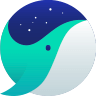
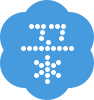

In [102]:
import requests as rq

url = "naver.com"
try:                                      #try - except  "MissingSchema" (정상적인 URL이 아닙니다.)
    res = rq.get(url)
except Exception as E:
    print(E)
    PC = "Http://"
    res = rq.get(PC+url)
    print(res.text)

Q6.

    아래 html에서 다음을 출력하세요
    # [<p>파이썬 크롤러 책1</p>, <p>전문서적</p>, <p>정보 문화사</p>]
    # [<p>파이썬 크롤러 책1</p>, <p>전문서적</p>]

In [110]:
#모듈 import 완료

#url, urlopen 생략 --> html로 바로 받아옴.
#html 받아오기
html ="""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
</head>
<body>
    <p>파이썬 크롤러 책1</p>
    <p>전문서적</p>
    <p id='d'>정보 문화사</p>
</body>
</html>
"""

#BeautifulSoup 로 html.parser 생성
soup = BeautifulSoup(html,'html.parser')

#html을 볼 수 있을시 tag를 기준으로 색출가능
#index를 활용해서 tag안 요소들을 가져옴.

findAll = soup.select('p') # tag<p>의 모든 요소를 불러옴
print(findAll)

findSP = soup.select('p')[0:2] 
print(findSP)

[<p>파이썬 크롤러 책1</p>, <p>전문서적</p>, <p id="d">정보 문화사</p>]
[<p>파이썬 크롤러 책1</p>, <p>전문서적</p>]


Q7

    아래와 같이 출력하세요
    # <title>Title</title>
    # <h2 id="target1">h2 태그</h2>
    # <a href="/" id="target2">a 태그</a>

In [120]:
# 모듈 import 완료
# url, urlopen skip(html존재)
html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
    <style>
        #target1{
            font-size: 40px;
            color: blue;
        }
        #target2{
            font-size: 40px;
            color: red;
        }
    </style>
</head>
<body>
    <h1>h1 태그</h1>
    <h2 id="target1">h2 태그</h2>
    <h3>h3 태그</h3>
    <a href="/" id="target2">a 태그</a>
</body>
</html>
"""

# BeautifulSoup 으로 html.parser생성
soup = BeautifulSoup(html,'html.parser')

#tag를 기준으로 색출. 
findt = soup.select('title') #select 시 리스트로 추출
find_2t = soup.title #soup.title은 head맨 앞부분. 바로 요소 추출가능.
print(findt)
print(find_2t)
findh2 = soup.select_one('h2')
print(findh2)
findah = soup.select_one('a')
print(findah)


[<title>Title</title>]
<title>Title</title>
<h2 id="target1">h2 태그</h2>
<a href="/" id="target2">a 태그</a>


Q8.

    * 아래 html 문에서 다음과 같이 출력되도록 스크레이핑 하세요.
    h1 = HTML 기본 구조
    li = html5 명시
    li = html 태그로 모든 태그를 감싸줌. lang이란 속성을 포함
    li = head 태그는 meta, title 이외의 style, script, link와 같은 태그 포함
    li = title 태그는 문서의 제목
    li = body 태그는 웹페이지의 내용 포함
    li = style 태그는 CSS 코드가 포함된는 태그
    li = script 태그는 JavaScript 코드를 작성하거나 파일 로드. head 태그 or body 태그 하단 위치

In [12]:
#모듈 import(완료)
#url,urlopen skip (html)
html = """
<html><body>
<div id="meigen">
  <h1>HTML 기본 구조</h1>
  <ul class="items">
    <li>html5 명시</li>
    <li>html 태그로 모든 태그를 감싸줌. lang이란 속성을 포함</li>
    <li>head 태그는 meta, title 이외의 style, script, link와 같은 태그 포함</li>
    <li>title 태그는 문서의 제목</li>
    <li>body 태그는 웹페이지의 내용 포함</li>
    <li>style 태그는 CSS 코드가 포함된는 태그</li>
    <li>script 태그는 JavaScript 코드를 작성하거나 파일 로드. head 태그 or body 태그 하단 위치</li>
  </ul>
</div>
</body></html>
"""

#BeautifulSoup으로 parser 생성
soup = BeautifulSoup(html,'html.parser')

# 찾아올 text분석시, <h1>은 tag<div , id='meien'> 에 소속 / <li>는 tag<ul class='items' 소속되어있음.
# 이 두가지를 기준으로 for문.
text = soup.select_one('h1').name #포함된 tag이름 추출
print(text)
texts = soup.find_all(['h1','li'])
for text in texts:
    print(text.name,'=',text.string)

h1
h1 = HTML 기본 구조
li = html5 명시
li = html 태그로 모든 태그를 감싸줌. lang이란 속성을 포함
li = head 태그는 meta, title 이외의 style, script, link와 같은 태그 포함
li = title 태그는 문서의 제목
li = body 태그는 웹페이지의 내용 포함
li = style 태그는 CSS 코드가 포함된는 태그
li = script 태그는 JavaScript 코드를 작성하거나 파일 로드. head 태그 or body 태그 하단 위치


Q9

    특정 웹사이트를 지정한 후 원하는 크롤링 만들기 (최대한 역량 발휘)

In [1]:
import urllib.request as req
from bs4 import BeautifulSoup as bs
import datetime as dt
URL = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%BD%94%EB%A1%9C%EB%82%98+%ED%99%95%EC%A7%84%EC%9E%90"
response = req.urlopen(URL)
soup = bs(response,'html.parser')
text_today = soup.select_one('p.info_num')
print(text_today.string)

today = dt.datetime.now().strftime('%Y-%m-%d')
print(today)

print(today, "현재 확진자 수 : ", text_today.string, "명")

161,541
2021-07-07
2021-07-07 현재 확진자 수 :  161,541 명
